In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings("ignore")

In [59]:
data = pd.read_excel('./datasets/printer_data_new2.xlsx')
user = pd.read_excel('./datasets/user_data.xlsx')

In [60]:
data.insert(10, '거리', 0, allow_duplicates=False)

data.head(2)

,상품명,가격,keyword,productid,업종,근무자수,기본 급지용량,내구성,인쇄 해상도,인쇄 속도,거리
0,ApeosPort 2560,2125000,흑백 디지털 복합기 잉크젯 포토프린터 컬러 출력 복사 스캔 팩스 인쇄 ...,1,법,87,300,2,4800,0,0
1,ApeosPort 3060,2200000,흑백 디지털 복합기 잉크젯 포토프린터 컬러 출력 복사 스캔 팩스 인쇄 ...,2,기타,23,1290,3,4800,0,0


In [61]:
#사용자 제품과 보유제품의 사이의 유사도를 구하는 공식: 유클리디안 거리 구하기;
def distance(x1, y1, z1, x2, y2, z2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2) + math.pow(z1 - z2, 2))
    return result

def recommend(userid, data):
    cmin, cmax = 0, 7

    #엑셀값을 받아 그래프를 찍는 배열
    x=[]#가격
    y=[]#인쇄속도
    z=[]#해상도

    #사용자의 기존 데이터나 원하는 데이터를 불러옴
    x1=user['가격'][userid] /1000
    y1=user['인쇄속도'][userid]
    z1=user['인쇄해상도'][userid]


    color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(5901)])

    #엑셀 데이터 값을 배열로 받아옴
    for i in range(0,5901):
        x.append(data.loc[i]['가격'] / 1000)
        y.append(data.loc[i]['인쇄 속도'])
        z.append(data.loc[i]['인쇄 해상도'])

    #그래프 크기 조정
    plt.rcParams["figure.figsize"] = (15, 15)
    fig = plt.figure()


    ax = fig.add_subplot(111, projection='3d')

    #사용자의 값 그래프에 표시
    ax.scatter(x1,y1,z1,  marker='x', s=15, c='blue')
    #보유제품의 배열을 그래프에 표시
    ax.scatter(x, y, z, marker='o', s=15, c=color, cmap='Reds')

    plt.legend(("사용자 요구 스펙","사무기기 스펙"),loc="best")

    ax.set_xlabel('가격')
    ax.set_ylabel('인쇄 속도')
    ax.set_zlabel('인쇄 해상도')

    #plt.show()

    #거리를 기존 dataframe에 저장
    for i in range(0,5901):
        data['거리'][i]=distance(x[i], y[i], z[i], x1, y1, z1)
        
    #거리가 가장 가까운것 부터 정렬    
    return data.sort_values(by=['거리'],axis=0)

userid를 입력해주세요.0

기존 제품의 가격 :  4000000   인쇄속도 :  25   인쇄해상도 :  4800

<기존 제품과 비슷한 제품 list>


,상품명,가격,업종,근무자수,기본 급지용량,내구성,인쇄 해상도,인쇄 속도
3359,HP 컬러 레이저젯 엔터프라이즈 MFP M776dn,4034000,교육,53,460,4,4800,0
3352,HP 컬러 레이저젯 엔터프라이즈 M751tn,3840000,은행,34,910,2,4800,0
3948,OKI ES8483x MFP,3800000,교육,97,100,4,4800,19
2752,HP 레이저젯 M5025 MFP,3699990,법,47,280,1,4800,0
3307,HP 컬러 레이저젯 엔터프라이즈 M680f,4300000,사무,68,810,2,4800,0


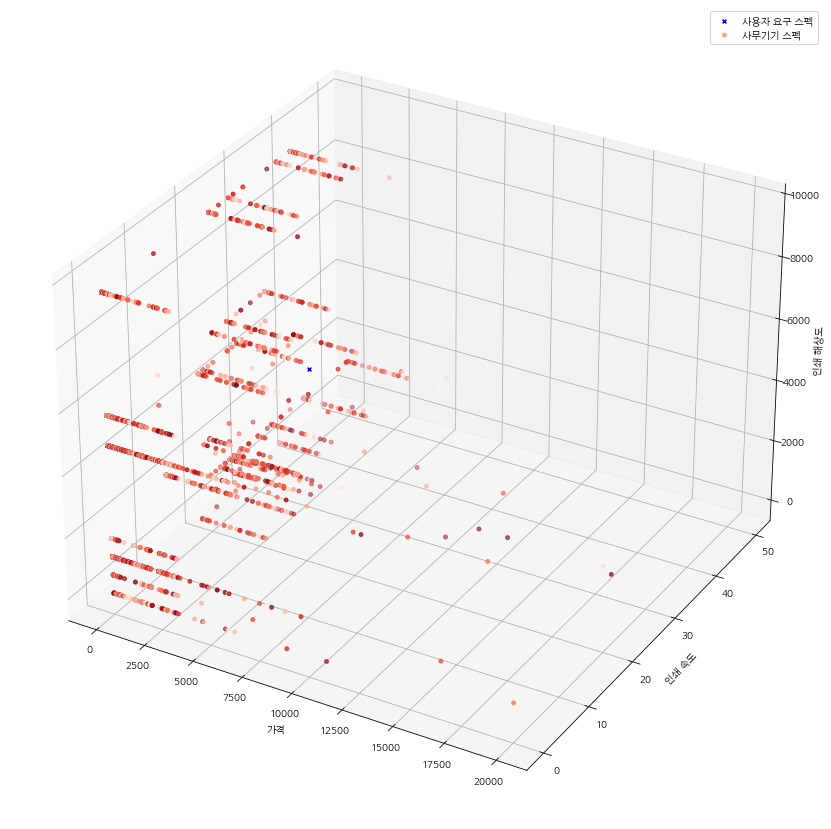

In [62]:
a = int(input('userid를 입력해주세요.'))
result = recommend(a, data)
print('\n기존 제품의 가격 : ',user['가격'][a], '  인쇄속도 : ', user['인쇄속도'][a], '  인쇄해상도 : ',user['인쇄해상도'][a])
print('\n<기존 제품과 비슷한 제품 list>')
result.head(5)
cols = ['keyword', 'productid','거리']
result = result.drop(cols, axis=1)
result.head(5)